<h1 style="font-family:verdana;"> <center>📊 Google stock prediction using LSTM  📊</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Pouya Shokravi</center></p>

***

![Google Stock](https://www.techi.com/wp-content/uploads/2025/09/20250926-Google-stock-hits-all-time-techi@2x--scaled.webp)

<div style="font-family:Georgia;line-height:25px">
<h2> 📘 Project and Dataset Description📈 </h2>
    
This notebook focuses on training and predicting Google (GOOGL) stock prices using a Long Short-Term Memory (LSTM) neural network implemented with TensorFlow. The main objective of this project is to model historical stock price data and capture temporal patterns in order to forecast future price movements.

The notebook includes data preprocessing steps such as normalization, sequence generation, and splitting the dataset into training and testing sets. An LSTM-based deep learning model is then built and trained using TensorFlow and Keras to learn long-term dependencies in the time-series data. Finally, the trained model is used to make predictions on unseen data, and the results are evaluated and visualized to analyze the model’s performance.

This project demonstrates the application of deep learning techniques for financial time-series forecasting using modern machine learning frameworks.

Dataset: <a href='https://www.kaggle.com/datasets/pouyashokravi/google-stock-2024'>https://www.kaggle.com/datasets/pouyashokravi/google-stock-2024</a>

</div></b>

<a id="1"></a>

<div style="font-family:Georgia;line-height:25px">
<h2> Why LSTM 📚 </h2>
    
Long Short-Term Memory (LSTM) networks are particularly well-suited for stock price prediction because financial data is inherently sequential and time-dependent. Unlike traditional machine learning models, LSTM is a type of Recurrent Neural Network (RNN) designed to capture long-term dependencies in time-series data.

Stock prices are influenced not only by recent values but also by patterns and trends that may span long periods of time. Standard RNNs often suffer from the vanishing and exploding gradient problems, which limit their ability to learn long-term relationships. LSTM overcomes these limitations through its internal gating mechanisms (input, forget, and output gates), allowing the model to selectively retain or discard information over time.

In this project, LSTM is used to learn complex temporal patterns in Google (GOOGL) stock price data, such as trends, momentum, and volatility. By leveraging historical price sequences, the LSTM model can make more accurate predictions compared to traditional statistical models or feedforward neural networks.

Overall, LSTM provides a powerful and effective approach for financial time-series forecasting, making it a suitable choice for training and predicting stock prices using TensorFlow.

</div></b>

<a id="1"></a>

# **Table of Contents**💭
1. [Project and Dataset Description](#1)
2. [Importing Libraries](#2)
3. [Loading Dataset](#3)
4. [EDA](#4)
5. [LSTM model preparation](#5)
6. [Modelling](#6)
7. [Validating](#7)
8. [Predict](#8)
9. [Finall](#9)

<a id="home"></a>

<a id="2"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:80%; padding:30px">Importing Libraries </p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [54]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from IPython.display import Image, display

#for modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

<a id="3"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:80%; padding:30px">Loading Dataset </p>

In [3]:
raw_df = pd.read_csv('/kaggle/input/google-stock-2024/Google.csv')

In [4]:
print('nomber of samples :',raw_df.shape[0])
print('nomber of columns :',raw_df.shape[1])
raw_df.head(11)

nomber of samples : 2113
nomber of columns : 8


,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.091999,65456000,GOOG
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.129002,39014000,GOOG
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000,GOOG
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.319500,59274000,GOOG
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.723499,49018000,GOOG
5,2016-01-11,35.830502,35.942749,35.176998,35.801498,35.801498,41812000,GOOG
6,2016-01-12,36.084000,36.437500,35.865849,36.303501,36.303501,40490000,GOOG
7,2016-01-13,36.542500,36.737000,34.930500,35.028000,35.028000,50034000,GOOG
8,2016-01-14,35.269001,36.096249,34.455002,35.736000,35.736000,44516000,GOOG
9,2016-01-15,34.614498,35.337002,34.268501,34.722500,34.722500,72162000,GOOG


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; first columns is unnamed so ve have tio change it to (date)
</div>

<a id="2"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px">Loading Dataset </p>

In [5]:
raw_df.rename( columns={raw_df.columns[0] : 'date'}, inplace=True)

In [6]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2113 non-null   object 
 1   open      2113 non-null   float64
 2   high      2113 non-null   float64
 3   low       2113 non-null   float64
 4   close     2113 non-null   float64
 5   adjclose  2113 non-null   float64
 6   volume    2113 non-null   int64  
 7   ticker    2113 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 132.2+ KB


In [7]:
raw_df.describe()

,open,high,low,close,adjclose,volume
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2.113000e+03
mean,82.510420,83.408536,81.696887,82.576327,82.576327,3.040611e+07
std,37.784157,38.224165,37.394997,37.818402,37.818402,1.406362e+07
min,33.392502,33.615002,33.153000,33.412998,33.412998,6.936000e+06
25%,52.043999,52.634998,51.264000,51.973000,51.973000,2.147350e+07
50%,68.087502,68.879997,67.449997,68.058502,68.058502,2.663600e+07
75%,116.760002,118.349998,115.337502,117.010498,117.010498,3.451000e+07
max,178.779999,179.949997,177.309998,179.539993,179.539993,1.269620e+08


# checking for null

In [8]:
print('Null Values:',raw_df.isnull().values.sum(),)

Null Values: 0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Everything is fine we dont have null. lets move to EDA
</div>

<a id="4"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px"> EDA </p>

In [9]:
print('starting date : ', raw_df.iloc[0][0])
print('last date : ', raw_df.iloc[-1][0])

starting date :  2016-01-04
last date :  2024-05-24


<p style="font-size:15px; font-family:verdana;">Data set date is starting from <span style="color:crimson;">2016-01-04</span> to <span style="color:crimson;">2024-05-24.<p>

<p>Have to change date column to datetime</p>


In [10]:
raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y-%m-%d')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2113 non-null   datetime64[ns]
 1   open      2113 non-null   float64       
 2   high      2113 non-null   float64       
 3   low       2113 non-null   float64       
 4   close     2113 non-null   float64       
 5   adjclose  2113 non-null   float64       
 6   volume    2113 non-null   int64         
 7   ticker    2113 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 132.2+ KB


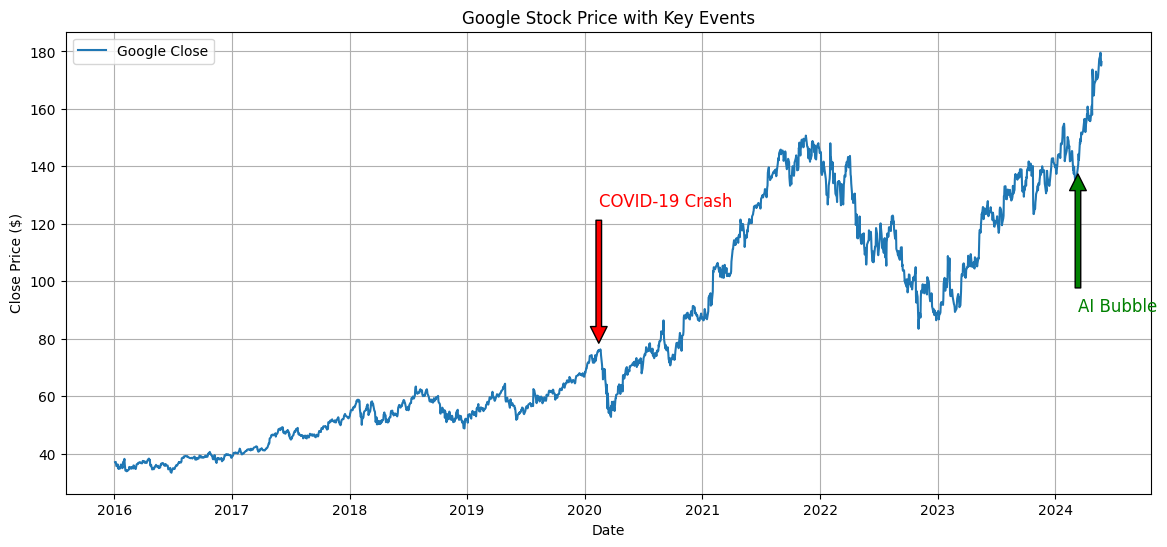

In [11]:

plt.figure(figsize=(14,6))
plt.plot(raw_df['date'], raw_df['close'], label='Google Close')


covid_target_date = pd.to_datetime('2020-02-16')
covid_idx = (raw_df['date'] - covid_target_date).abs().idxmin()
covid_price = raw_df.loc[covid_idx, 'close']
covid_date = raw_df.loc[covid_idx, 'date']

plt.annotate(
    'COVID-19 Crash',
    xy=(covid_date, covid_price),
    xytext=(covid_date, covid_price + 50),
    arrowprops=dict(facecolor='red', shrink=0.05),
    fontsize=12,
    color='red'
)

ai_target_date = pd.to_datetime('2024-03-12')
ai_idx = (raw_df['date'] - ai_target_date).abs().idxmin()
ai_price = raw_df.loc[ai_idx, 'close']
ai_date = raw_df.loc[ai_idx, 'date']

plt.annotate(
    'AI Bubble',
    xy=(ai_date, ai_price),
    xytext=(ai_date, ai_price - 50),
    arrowprops=dict(facecolor='green', shrink=0.05),
    fontsize=12,
    color='green'
)

plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.title('Google Stock Price with Key Events')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; As we can see, there was a crash in 2020 caused by the corona viros. AS of mind-2024 the market is in AI bubble similar to the dot-com bubble in the past, which could burst at any time
</div>

In [12]:
pip install --upgrade mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [13]:
import mplfinance as mpf

In [14]:
p_df = raw_df.copy(deep=True)
p_df['date'] = pd.to_datetime(p_df['date'])
p_df.set_index('date', inplace=True)
p_df['year'] = p_df.index.year

<Figure size 640x480 with 0 Axes>

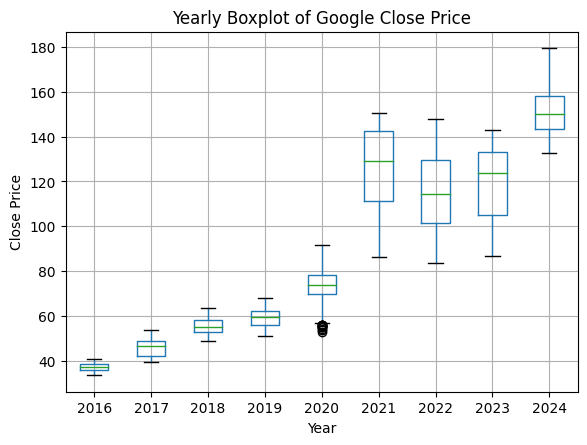

In [15]:
plt.figure()
p_df.boxplot(column='close', by='year')
plt.title('Yearly Boxplot of Google Close Price')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


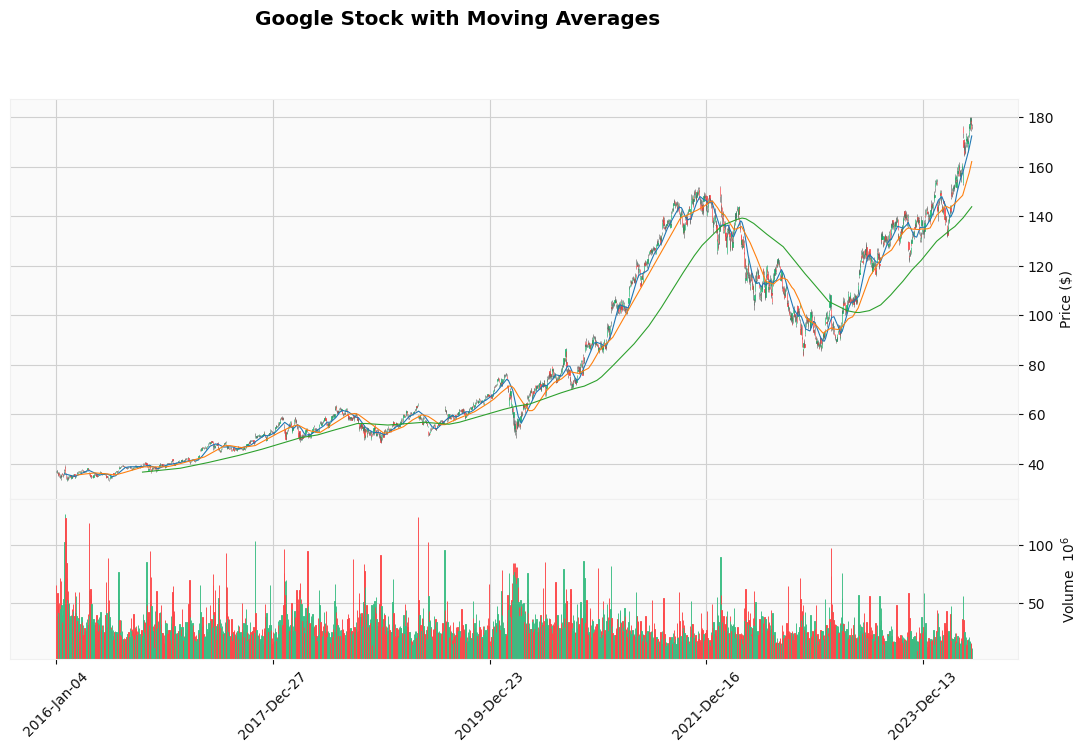

In [16]:
mpf.plot(p_df,
         type='candle',
         mav=(20,50,200),
         style='yahoo',
         title='Google Stock with Moving Averages',
         ylabel='Price ($)',
         volume=True,
        figsize=(14, 8))

In [17]:
import plotly.express as px

fig = px.line(
    raw_df,
    x='date',
    y=['open', 'close', 'high', 'low'],
    labels={'value':'Stock Price ($)', 'variable':'Stock Parameter'},
    title='Google Stock Analysis'
)

fig.update_layout(
    font_size=14,
    font_color='black',
    legend_title_text='Stock Parameters',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()


<a id="5"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px"> LSTM Modell Preparation</p>

<p style="font-size:17px; font-family:verdana;"> 📌 I want to Train my modell with 4 features <span style="color:crimson;">Close, Volume, EMA20, EMA50</span> and my target is Close Price 
    so create adf copy and add ema 20 & ema 50. from raw_df just hold close price and valume <p>



In [18]:
df = raw_df.copy(deep=True)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df.set_index('date', inplace=True)

In [19]:
df['EMA20'] = df['close'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['close'].ewm(span=50, adjust=False).mean()

In [20]:
selected_features = ['close', 'volume', 'EMA20', 'EMA50']
df_model = df[selected_features].dropna()
df_model.head(3)

,close,volume,EMA20,EMA50
date,,,,
2016-01-04,37.091999,65456000,37.091999,37.091999
2016-01-05,37.129002,39014000,37.095523,37.093450
2016-01-06,37.181000,38940000,37.103664,37.096883


## Normilize data and set window size

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_model)


In [22]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        #for close price
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, window_size=60)


In [23]:
split = int(0.7 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("train_data: ", X_train.shape)
print("test_data: ", X_test.shape)


train_data:  (1437, 60, 4)
test_data:  (616, 60, 4)


<a id="6"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px"> Modelling</p>

<h1 id="basics" style="font-family:verdana;"> 
    <center> Model 1 

In [29]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    
    Dropout(0.2),
    
    LSTM(64),
        
    Dense(1)
])
model.compile(optimizer='adam',loss='mse')

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,753 (198.25 KB)

 Trainable params: 50,753 (198.25 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.8943e-04 - val_loss: 0.0015
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 2.6397e-04 - val_loss: 0.0014
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.1797e-04 - val_loss: 0.0015
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 2.3643e-04 - val_loss: 0.0016
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 2.1161e-04 - val_loss: 0.0017
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 2.2611e-04 - val_loss: 0.0013
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.0697e-04 - val_loss: 0.0015
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 2.3780e-04 - val_loss: 0.0018
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 2.2579e-04 - val_loss: 0.0027
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 2.2227e-04 - val_loss: 0.0018
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 2.0369e-04 - val_loss: 0.0021
Epoch 12/50
45/45 ━

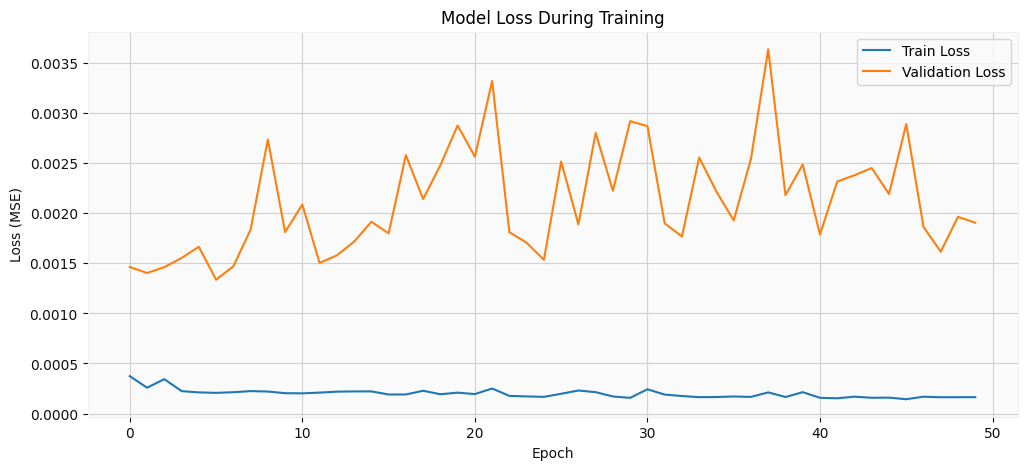

In [34]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


<h1 id="basics" style="font-family:verdana;"> 
    <center> Model 2

In [38]:
model_2 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    
    Dropout(0.2),
        
    Dense(1)
])
model_2.compile(optimizer='adam',loss='mse')

model_2.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 60, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 60, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history_2 = model_2.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0387 - val_loss: 0.1600
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0404 - val_loss: 0.1825
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0386 - val_loss: 0.1636
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0411 - val_loss: 0.1535
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0388 - val_loss: 0.1509
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0417 - val_loss: 0.1488
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0421 - val_loss: 0.1942
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0396 - val_loss: 0.1452
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0420 - val_loss: 0.1663
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0424 - val_loss: 0.1504
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0408 - val_loss: 0.1763
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0

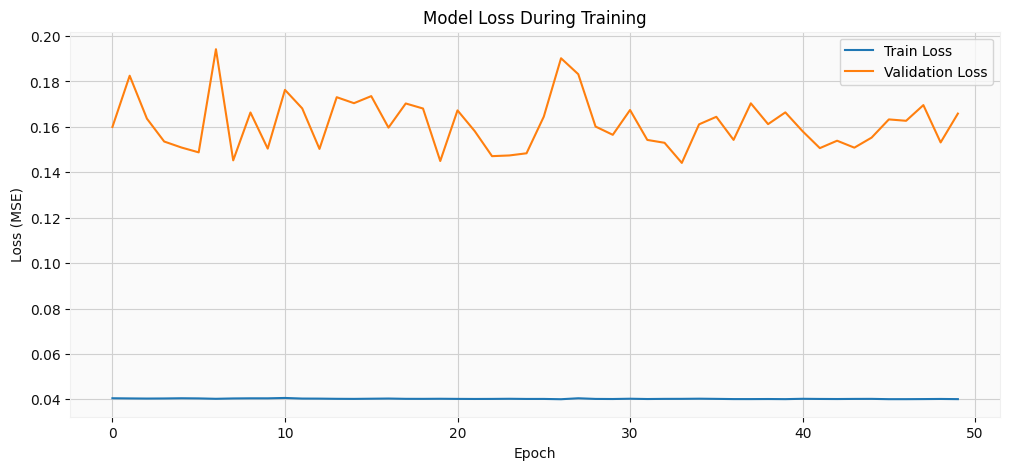

In [41]:
plt.figure(figsize=(12,5))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


<h1 id="basics" style="font-family:verdana;"> 
    <center> Model 3 🎖

In [28]:
model_3 = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    
    Dropout(0.2),
    
    LSTM(64),
    
    Dropout(0.2),
    
    Dense(1)
])
model_3.compile(optimizer='adam',loss='mse')

model_3.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,753 (198.25 KB)

 Trainable params: 50,753 (198.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_3 = model_3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0284 - val_loss: 0.0025
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.8461e-04 - val_loss: 0.0019
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 9.2972e-04 - val_loss: 0.0019
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 9.6072e-04 - val_loss: 0.0019
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 9/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 8.2287e-04 - val_loss: 0.0018
Epoch 10/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 9.2126e-04 - val_loss: 0.0028
Epoch 11/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 9.0815e-04 - val_loss: 0.0021
Epoch 12/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 

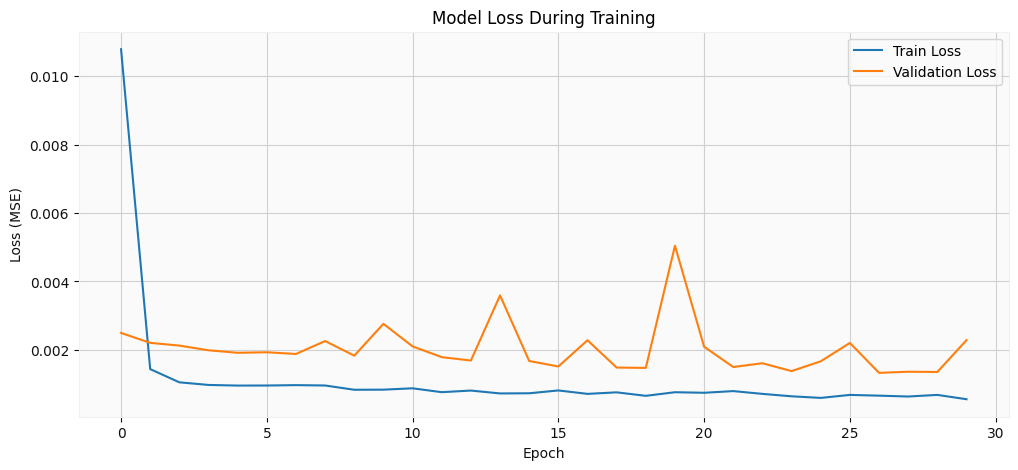

In [30]:
plt.figure(figsize=(12,5))
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Good, lets rescale and validate the model by the R2 scoore and variance regression score
</div>

<a id="7"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px"> Validating</p>

In [35]:
train_predict = model_3.predict(X_train, verbose=0)
y_pred = model_3.predict(X_test, verbose=0)
n_features = X_train.shape[2]

In [36]:

# y_train real
fake_ytrain = np.zeros((len(y_train), n_features))
fake_ytrain[:, 0] = y_train.flatten()
original_ytrain = scaler.inverse_transform(fake_ytrain)[:, 0]

# y_test
fake_y_test = np.zeros((len(y_test), n_features))
fake_y_test[:, 0] = y_test.flatten()
y_test_inv = scaler.inverse_transform(fake_y_test)[:, 0]

# y_pred
fake_y_pred = np.zeros((len(y_pred), n_features))
fake_y_pred[:, 0] = y_pred.flatten()
y_pred_inv = scaler.inverse_transform(fake_y_pred)[:, 0]

# train predict
fake_train_pred = np.zeros((len(train_predict), n_features))
fake_train_pred[:, 0] = train_predict.flatten()
train_predict_inv = scaler.inverse_transform(fake_train_pred)[:, 0]


In [39]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict_inv))


Train data R2 score: 0.9932136833888305


In [40]:
print("variance regression score:", 
      explained_variance_score(original_ytrain, train_predict_inv))

variance regression score: 0.9939321068654455


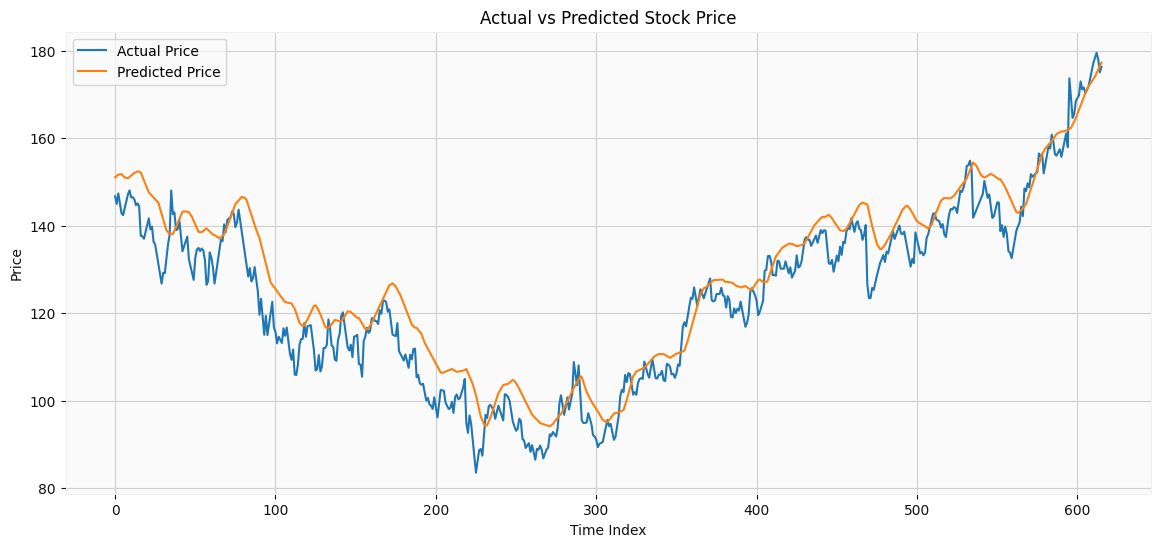

In [41]:

plt.figure(figsize=(14,6))

plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')

plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    😃 &nbsp; As we can see the model can predict price and trend perfectly.</br> Lets predict the next 30 days
</div>

<a id="8"></a>
# <p style="background:linear-gradient(135deg, #ff416c, #8a2387); font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:30px 50px; width:90%; padding:30px"> predicting next 30 days</p>

In [46]:
window_size = X_train.shape[1]
future_days = 30

last_window = X_test[-1]
current_window = last_window.copy()

future_predictions = []


In [47]:
for _ in range(future_days):
    pred = model_3.predict(
        current_window.reshape(1, window_size, n_features),
        verbose=0
    )

    future_predictions.append(pred[0, 0])

    new_row = current_window[-1].copy()
    new_row[0] = pred

    current_window = np.vstack([current_window[1:], new_row])


In [48]:
future_predictions = np.array(future_predictions).reshape(-1,1)

fake_future = np.zeros((future_days, n_features))
fake_future[:, 0] = future_predictions.flatten()

future_predictions_inv = scaler.inverse_transform(fake_future)[:, 0]


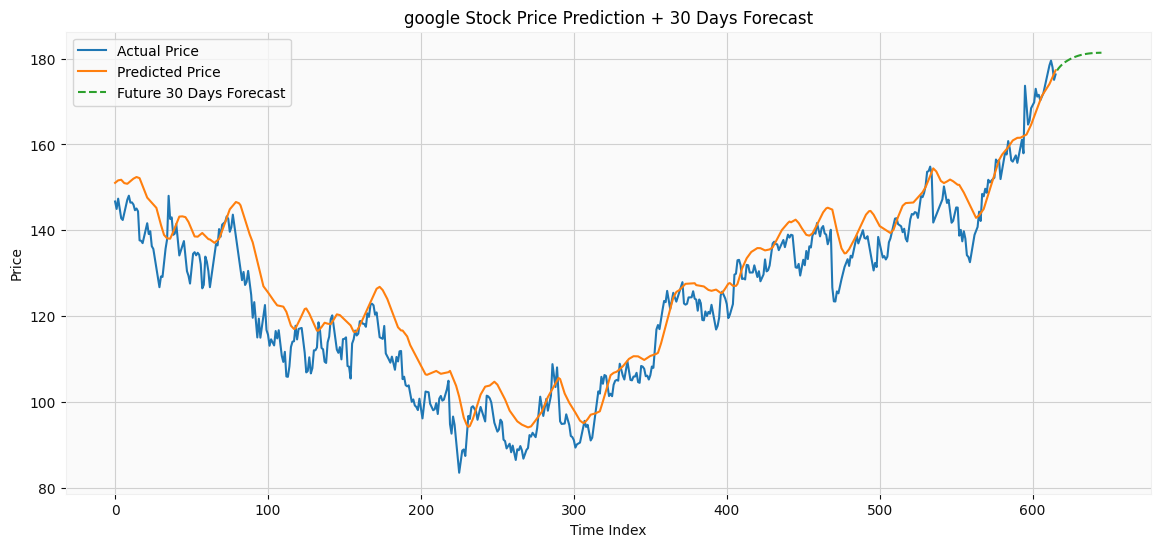

In [50]:
plt.figure(figsize=(14,6))

plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')

future_x = range(len(y_pred_inv), len(y_pred_inv) + future_days)
plt.plot(future_x, future_predictions_inv,
         label='Future 30 Days Forecast',
         linestyle='--')

plt.title('google Stock Price Prediction + 30 Days Forecast')
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


<h1 id="9">
        Finally... 💭
        <a class="anchor-link" href="https://www.kaggle.com/shubhamksingh/formatting-notebooks-tutorial-html-markdown/notebook#final">¶</a>
    </h1>
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">
    As you can see, we built a model capable of learning historical patterns and predicting Google stock prices using LSTM neural network 
    <br>
    <center style="font-family:cursive; font-size:18px; color:#159364;">Thanks for your reading🙌🏻! I hope you like this notebook.Please consider giving it an <span style="color:crimson;">Upvote</span> and <span style="color:crimson;">Star</span> in the repository</center>
</p>

***